# VAEX y DASK
## Cuaderno 2/4
Actividad Lección 6 || Programación Python para Big Data

Objetivos:
* Aprender más sobre VAEX y DASK
* Fomentar la proactividad del alumno

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 09/09/2022

# Tabla de contenidos:
1. [Profundizando en DASK](#profundizando)
    1. [Lectura de datos películas](#peliculas)
    2. [Lectura de datos valoraciones](#valoraciones)
    3. [Lectura de datos etiquetas)](#etiquetas)
    4. [Combinación de datos](#combinacion)
    5. [Valoraciones por año](#valoraciones-anio)
    6. [Etiquetas más valoradas](#etiquetas-valoradas)
    7. [Top usuarios con más valoraciones por tags](#top-usuarios)

## Profundizando en DASK <a class="anchor" name="profundizando"></a>
Para este apartado trabajaré con el dataset de Movielens, que contiene información sobre películas y valoraciones de usuarios.

In [82]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de datos películas <a class="anchor" name="peliculas"></a>

In [83]:
df_movies: dd.DataFrame = dd.read_csv('data/movielens/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Lectura de datos valoraciones <a class="anchor" name="valoraciones"></a>

In [84]:
df_ratings: dd.DataFrame = dd.read_csv('data/movielens/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


### Lectura de datos etiquetas <a class="anchor" name="etiquetas"></a>

In [85]:
df_tags: dd.DataFrame = dd.read_csv('data/movielens/tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


### Combinación de datos <a class="anchor" name="combinacion"></a>

In [86]:
# Merge the three dataframes
df_mov_rat: dd.DataFrame = df_ratings.merge(df_movies, on='movieId', how='left')
df_movielens: dd.DataFrame = df_mov_rat.merge(df_tags, on=['userId', 'movieId'], how='left')
# rename timestamp_x to rating_timestamp and timestamp_y to tag_timestamp
df_movielens: dd.DataFrame = df_movielens.rename(columns={'timestamp_x': 'rating_timestamp', 'timestamp_y': 'tag_timestamp'})
df_movielens["rating_timestamp"] = dd.to_datetime(df_movielens["rating_timestamp"], unit='s', origin='unix')
df_movielens["tag_timestamp"] = dd.to_datetime(df_movielens["tag_timestamp"], unit='s', origin='unix')
df_movielens.head()

,userId,movieId,rating,rating_timestamp,title,genres,tag,tag_timestamp
0,1,296,5.0,2006-05-17 15:34:04,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,NaN,NaT
1,1,306,3.5,2006-05-17 12:26:57,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,NaN,NaT
2,1,307,5.0,2006-05-17 12:27:08,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,NaN,NaT
3,1,665,5.0,2006-05-17 15:13:40,Underground (1995),Comedy|Drama|War,NaN,NaT
4,1,899,3.5,2006-05-17 12:21:50,Singin' in the Rain (1952),Comedy|Musical|Romance,NaN,NaT


### Valoraciones por año <a class="anchor" name="valoraciones-anio"></a>

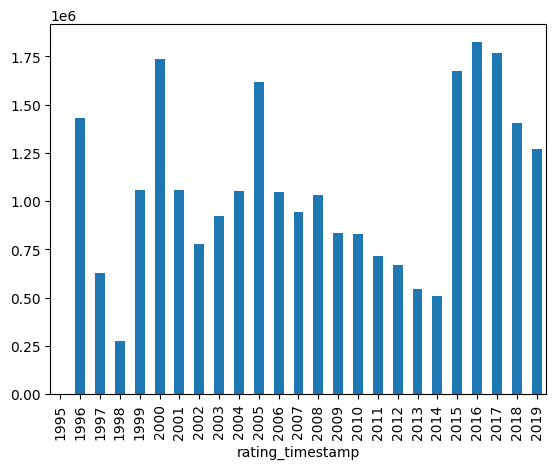

In [87]:
# plot the number of ratings per year
df_movielens.groupby(df_movielens.rating_timestamp.dt.year)\
    .rating\
    .count()\
    .compute()\
    .plot(kind='bar')
plt.show()

### Etiquetas más valoradas <a class="anchor" name="etiquetas-valoradas"></a>

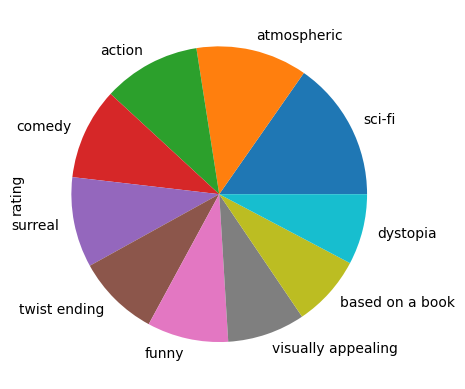

In [88]:
# plot the top tags rated by users as pie
df_movielens.groupby('tag')\
    .rating\
    .count()\
    .nlargest(10)\
    .compute()\
    .plot(kind='pie')
plt.show()

### Top usuarios con más valoraciones por tags <a class="anchor" name="top-usuarios"></a>

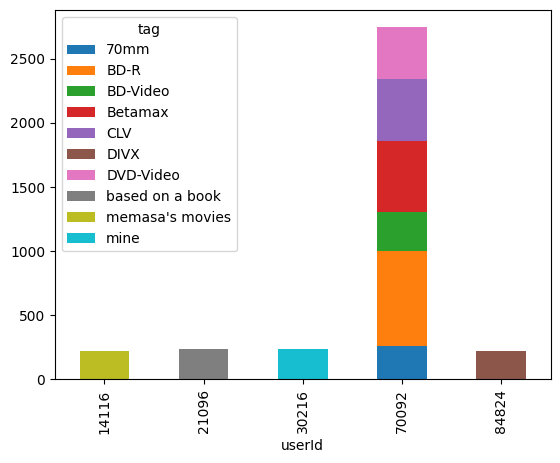

In [9]:
# plot the top 10 users who rated the most movies with the legend as the tag
df_movielens[['userId', 'tag', 'rating']]\
    .groupby(['userId', 'tag'])\
    .rating\
    .count()\
    .nlargest(10)\
    .compute()\
    .unstack()\
    .plot(kind='bar', stacked=True)
plt.show()